# 1 - ENVIRONMENT SETUP

## 1 - install and import package

In [1]:
import os
import re
from IPython.core.display import HTML

import pandas as pd
import numpy as np

#visualisation
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS


#-----------nltk------------------
import nltk
#nltk.download('punkt')
#----> nltk utilise le modele pré-entrainé punkt
#nltk.download('wordnet')
#---->base de données regroupand les différents synonymes.
#nltk.download('omw-1.4')
#nltk.download('averaged_perceptron_tagger')

from nltk.corpus import abc
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.stem.snowball import *
from nltk.util import ngrams
from nltk.sentiment import SentimentIntensityAnalyzer


#----------spacy------------------
import spacy
#!python -m spacy download en_core_web_sm
spacy.load('en_core_web_sm')



#----------sklearn----------------
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.decomposition import PCA

#---------gensim----------------
import gensim
from gensim.models.word2vec import Text8Corpus
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

#-------AUTRES
import contractions


import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(keras.__version__)

2023-06-15 08:33:48.176073: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-15 08:33:48.758238: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-15 08:33:48.759639: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-15 08:33:51.774297: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


2.12.0
2.12.0


In [12]:
#Nombre de GPU di sponible:(je n'ai pas de carte graphique Nvidia)
print(tf.__version__)
print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.12.0
2.12.0
Num GPUs Available:  0
True


# 2 - Data Preprocessing

## 2.1 - Data Loading 

In [13]:
for dossier in os.listdir(os.getcwd()):
    print(dossier)

.ipynb_checkpoints
Gestion des packages.ipynb
Data
Exploration.ipynb
Bibliographie


In [14]:
os.listdir('Data')

['Cleaned', 'Raw']

In [15]:
os.listdir('Data/Raw')

['.ipynb_checkpoints',
 'Weather_Images_CNN_Transfer_Learning_Stage_1_feasibility_V1.0(1).ipynb',
 'Dataset+projet+prétraitement+textes+images',
 'Dataset+projet+prétraitement+textes+images.zip']

In [16]:
os.listdir('Data/Raw/Dataset+projet+prétraitement+textes+images')

['Flipkart']

In [17]:
path = 'Data/Raw/Dataset+projet+prétraitement+textes+images/Flipkart'
nom_fichier = 'flipkart_com-ecommerce_sample_1050.csv'
chemin_complet = os.path.join(path , nom_fichier)

In [18]:
df = pd.read_csv(chemin_complet)

## 2.2  - Preliminary Analysis

In [19]:
display(df.shape, df.head())

(1050, 15)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

### Remarque
La colonne product categorie tree doit etre la colonne que nous devons essayer d'implement automatiquement.
Nous considérons l'ensemble des textes comme le corpus, nous allons concatener l'ensemble des colonnes textuelles pour faire de chacune des lignes les documents du corpus.
Nous remarquons que seule les colonnes product specifications a une valeur NaN

In [21]:
df_M = df.copy()
#récuperation de l'indice ou pour la colonne product spécification est manquante
cond = df_M['product_specifications'].isna()
rqdindex = df_M[cond].index
df_M.loc[rqdindex,'product_specifications'] = 'no_spécification'
print(f"le nombre valeures manquantes pour la variable : 'product_specifications' est = {df_M['product_specifications'].isna().sum()}")

le nombre valeures manquantes pour la variable : 'product_specifications' est = 0


In [22]:
%time
df_test = df_M.copy()
df_test['doc_raw'] = df_M.apply(lambda row: ' '.join([row['product_url'], row['product_name'], row['product_category_tree'], row['description'], row['product_specifications']]), axis=1)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs


In [23]:
%time
df_test = df_M.copy()
df_test['doc_raw'] = df_M['product_url'] + df_M['product_name'] + df_M['product_category_tree'] + df_M['description'] + df_M['product_specifications']

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.15 µs


### product_category_tree

In [25]:
df_M['product_category_tree'].unique()

array(['["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]',
       '["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y..."]',
       '["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Eurospa Baby Bath Towels >> Eurospa Cotton Terry Face Towel Set (20 PIECE FA..."]',
       '["Home Furnishing >> Bed Linen >> Bedsheets >> SANTOSH ROYAL FASHION Bedsheets >> SANTOSH ROYAL FASHION Cotton Printed King sized ..."]',
       '["Home Furnishing >> Bed Linen >> Bedsheets >> Jaipur Print Bedsheets >> Jaipur Print Cotton Floral King sized Double Bed..."]',
       '["Watches >> Wrist Watches >> Maserati Time Wrist Watches"]',
       '["Watches >> Wrist Watches >> Camerii Wrist Watches"]',
       '["Watches >> Wrist Watches >> T STAR Wrist Watches"]',
       '["Watches >> Wrist Watches >> Alfajr Wrist Watches"]',
       '["Watches >> Wrist Watches >> T

In [31]:
#observation pour 1 ligne
df_M.loc[1,'product_category_tree']

'["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y..."]'

Nous allons effectuer un preprocess textuelle pour 

## 2.3 - Text preprocessing

### 2.3.1 -  Document Brut

In [14]:
#creation de la colonne :
df_M['doc_raw'] = df_M['product_url'] + df_M['product_name'] + df_M['product_category_tree'] + df_M['description'] + df_M['product_specifications']

#Verification duplicates
duplicates = df_M['doc_raw'].duplicated()
value_counts = duplicates.value_counts()
if True in value_counts:
    only_true = value_counts[True]
else:
    only_true = 0
print(f"le nombre de valeurs dupliqué est {only_true} \n")

        
#analyses des documents
print(f"la longueur des documents :")
print(f"{df_M['doc_raw'].apply(len).describe().astype(int)} \n")
    
df_M.loc[1,'doc_raw']

le nombre de valeurs dupliqué est 0 

la longueur des documents :
count    1050
mean     1340
std       651
min       439
25%       907
50%      1192
75%      1535
max      6971
Name: doc_raw, dtype: int64 



'http://www.flipkart.com/sathiyas-cotton-bath-towel/p/itmegfzhxbyucwgn?pid=BTWEGFZHGBXPHZUHSathiyas Cotton Bath Towel["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y..."]Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Features Machine Washable Yes Material Cotton Design Self Design General Brand Sathiyas Type Bath Towel GSM 500 Model Name Sathiyas cotton bath towel Ideal For Men, Women, Boys, Girls Model ID asvtwl322 Color Red, Yellow, Blue Size Mediam Dimensions Length 30 inch Width 60 inch In the Box Number of Contents in Sales Package 3 Sales Package 3 Bath Towel{"product_specification"=>[{"key"=>"Machine Washable", "value"=>"Yes"}, {"key"=>"Material", "value"=>"Cotton"}, {"key"=>"Design", "value"=>"Self Design"}, {"key"=>"Brand", "value"=>"Sathiyas"}, {"key"=>"Type", "value"=>"Bath Towel"}, {"key"=>"GSM", "value"=>"500"}, {"key"=>"Model Name", "value"=>"Sath

### 2.3.2 - Netoyage

In [15]:
#1 - Lower case
df_M['doc_clean'] = df_M['doc_raw'].apply(lambda x : x.lower())

#2 - contractions(english)
df_M['doc_clean'] = df_M['doc_clean'].apply(lambda x : contractions.fix(x))

#3 - Suppression des bruits
#special pouir ce document


#3.1 - url
def remove_URL(text):
    return re.sub(r"https?://\S+|www\.\S+", "", text)
df_M['doc_clean'] = df_M['doc_clean'].apply(lambda x : remove_URL(x))

#3.2 - html_tag
def remove_html(text):
    html = re.compile(r"<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});")
    return re.sub(html, "", text)
df_M['doc_clean'] = df_M['doc_clean'].apply(lambda x : remove_html(x))

#3.3 - nn ascii
def remove_non_ascii(text):
    return re.sub(r'[^\x00-\x7f]',r'', text) # or ''.join([x for x in text if x in string.printable]) 
df_M['doc_clean'] = df_M['doc_clean'].apply(lambda x : remove_non_ascii(x))

#3.4 - ponctuation
def remove_punct(text):
    return re.sub(r'[]!"$>%&\'()*+,./:;=#@?[\\^_`{|}~-]+', "", text) #ajout de >
    #return text.translate(str.maketrans('', '', string.punctuation))
df_M['doc_clean'] = df_M['doc_clean'].apply(lambda x : remove_punct(x))

df_M.style.set_properties(subset=['nltk_doc','doc_clean'], height=1000)
df_M[['doc_raw','doc_clean']].head(5)

,doc_raw,doc_clean
0,http://www.flipkart.com/elegance-polyester-mul...,polyester multicolor abstract eyelet door cur...
1,http://www.flipkart.com/sathiyas-cotton-bath-t...,cotton bath towelbaby care baby bath skin ...
2,http://www.flipkart.com/eurospa-cotton-terry-f...,cotton terry face towel setbaby care baby ba...
3,http://www.flipkart.com/santosh-royal-fashion-...,royal fashion cotton printed king sized doubl...
4,http://www.flipkart.com/jaipur-print-cotton-fl...,print cotton floral king sized double bedshee...


In [16]:
df_M.loc[1,'doc_clean']

' cotton bath towelbaby care  baby bath  skin  baby bath towels  sathiyas baby bath towels  sathiyas cotton bath towel 3 bath towel red yspecifications of sathiyas cotton bath towel 3 bath towel red yellow blue bath towel features machine washable yes material cotton design self design general brand sathiyas type bath towel gsm 500 model name sathiyas cotton bath towel ideal for men women boys girls model id asvtwl322 color red yellow blue size mediam dimensions length 30 inch width 60 inch in the box number of contents in sales package 3 sales package 3 bath towelproductspecificationkeymachine washable valueyes keymaterial valuecotton keydesign valueself design keybrand valuesathiyas keytype valuebath towel keygsm value500 keymodel name valuesathiyas cotton bath towel keyideal for valuemen women boys girls keymodel id valueasvtwl322 keycolor valuered yellow blue keysize valuemediam keylength value30 inch keywidth value60 inch keynumber of contents in sales package value3 keysales pack

### 2.3.3 - word tokenization

#### Avec punkt de nltk

In [17]:
%time
df_M['doc_tokenize_nltk'] = df_M['doc_clean'].apply(word_tokenize)
print(df_M.loc[1,'doc_tokenize_nltk'])

CPU times: user 1 µs, sys: 1e+03 ns, total: 2 µs
Wall time: 5.25 µs
['cotton', 'bath', 'towelbaby', 'care', 'baby', 'bath', 'skin', 'baby', 'bath', 'towels', 'sathiyas', 'baby', 'bath', 'towels', 'sathiyas', 'cotton', 'bath', 'towel', '3', 'bath', 'towel', 'red', 'yspecifications', 'of', 'sathiyas', 'cotton', 'bath', 'towel', '3', 'bath', 'towel', 'red', 'yellow', 'blue', 'bath', 'towel', 'features', 'machine', 'washable', 'yes', 'material', 'cotton', 'design', 'self', 'design', 'general', 'brand', 'sathiyas', 'type', 'bath', 'towel', 'gsm', '500', 'model', 'name', 'sathiyas', 'cotton', 'bath', 'towel', 'ideal', 'for', 'men', 'women', 'boys', 'girls', 'model', 'id', 'asvtwl322', 'color', 'red', 'yellow', 'blue', 'size', 'mediam', 'dimensions', 'length', '30', 'inch', 'width', '60', 'inch', 'in', 'the', 'box', 'number', 'of', 'contents', 'in', 'sales', 'package', '3', 'sales', 'package', '3', 'bath', 'towelproductspecificationkeymachine', 'washable', 'valueyes', 'keymaterial', 'valuecot

#### Avec spacy

In [18]:
%time
sp = spacy.load('en_core_web_sm')
df_M['doc_tokenize_spacy'] = df_M['doc_clean'].apply(sp)
print(df_M.loc[1,'doc_tokenize_spacy'])

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 6.2 µs
 cotton bath towelbaby care  baby bath  skin  baby bath towels  sathiyas baby bath towels  sathiyas cotton bath towel 3 bath towel red yspecifications of sathiyas cotton bath towel 3 bath towel red yellow blue bath towel features machine washable yes material cotton design self design general brand sathiyas type bath towel gsm 500 model name sathiyas cotton bath towel ideal for men women boys girls model id asvtwl322 color red yellow blue size mediam dimensions length 30 inch width 60 inch in the box number of contents in sales package 3 sales package 3 bath towelproductspecificationkeymachine washable valueyes keymaterial valuecotton keydesign valueself design keybrand valuesathiyas keytype valuebath towel keygsm value500 keymodel name valuesathiyas cotton bath towel keyideal for valuemen women boys girls keymodel id valueasvtwl322 keycolor valuered yellow blue keysize valuemediam keylength value30 inch keywidth value60 in

### 2.3.4 - Stopword removal

#### Avec nltk

In [19]:
nltk.download('stopwords')
stop_words = stopwords.words('english')
stop_words.extend(['key', 'value'])
df_M['doc_stopwords_remove'] = df_M['doc_tokenize_nltk'].apply(lambda x : [mot for mot in x if mot.lower() not in stop_words])

print(df_M.loc[1,'doc_stopwords_remove'])

[nltk_data] Downloading package stopwords to /home/bryan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['cotton', 'bath', 'towelbaby', 'care', 'baby', 'bath', 'skin', 'baby', 'bath', 'towels', 'sathiyas', 'baby', 'bath', 'towels', 'sathiyas', 'cotton', 'bath', 'towel', '3', 'bath', 'towel', 'red', 'yspecifications', 'sathiyas', 'cotton', 'bath', 'towel', '3', 'bath', 'towel', 'red', 'yellow', 'blue', 'bath', 'towel', 'features', 'machine', 'washable', 'yes', 'material', 'cotton', 'design', 'self', 'design', 'general', 'brand', 'sathiyas', 'type', 'bath', 'towel', 'gsm', '500', 'model', 'name', 'sathiyas', 'cotton', 'bath', 'towel', 'ideal', 'men', 'women', 'boys', 'girls', 'model', 'id', 'asvtwl322', 'color', 'red', 'yellow', 'blue', 'size', 'mediam', 'dimensions', 'length', '30', 'inch', 'width', '60', 'inch', 'box', 'number', 'contents', 'sales', 'package', '3', 'sales', 'package', '3', 'bath', 'towelproductspecificationkeymachine', 'washable', 'valueyes', 'keymaterial', 'valuecotton', 'keydesign', 'valueself', 'design', 'keybrand', 'valuesathiyas', 'keytype', 'valuebath', 'towel', 'k

### 2.3.5 - stemming

pour le stemmering nltk utlise 3 algorithmes : 
 - Porter
 - Snow ball (ou porter2 qui est plus agressive)
 - Lancaster (veryagressive
 Nous allons utiliser le snowball car nous allons effectuer une lemmerisation par la suite.

In [20]:
#stemmering
from nltk.stem.snowball import EnglishStemmer
#insgnciation des objets : 
stemmer = EnglishStemmer()
df_M['doc_stemmer'] = df_M['doc_stopwords_remove'].apply(lambda x : [stemmer.stem(mot) for mot in x])
print(df_M.loc[1,'doc_stemmer'])

['cotton', 'bath', 'towelbabi', 'care', 'babi', 'bath', 'skin', 'babi', 'bath', 'towel', 'sathiya', 'babi', 'bath', 'towel', 'sathiya', 'cotton', 'bath', 'towel', '3', 'bath', 'towel', 'red', 'yspecif', 'sathiya', 'cotton', 'bath', 'towel', '3', 'bath', 'towel', 'red', 'yellow', 'blue', 'bath', 'towel', 'featur', 'machin', 'washabl', 'yes', 'materi', 'cotton', 'design', 'self', 'design', 'general', 'brand', 'sathiya', 'type', 'bath', 'towel', 'gsm', '500', 'model', 'name', 'sathiya', 'cotton', 'bath', 'towel', 'ideal', 'men', 'women', 'boy', 'girl', 'model', 'id', 'asvtwl322', 'color', 'red', 'yellow', 'blue', 'size', 'mediam', 'dimens', 'length', '30', 'inch', 'width', '60', 'inch', 'box', 'number', 'content', 'sale', 'packag', '3', 'sale', 'packag', '3', 'bath', 'towelproductspecificationkeymachin', 'washabl', 'valuey', 'keymateri', 'valuecotton', 'keydesign', 'valueself', 'design', 'keybrand', 'valuesathiya', 'keytyp', 'valuebath', 'towel', 'keygsm', 'value500', 'keymodel', 'name', 

### 2.3.6 - Lemmatization

In [21]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
df_M['doc_lemma'] = df_M['doc_stopwords_remove'].apply(lambda x : [lemmatizer.lemmatize(mot) for mot in x])
print(df_M.loc[1,'doc_lemma'])

['cotton', 'bath', 'towelbaby', 'care', 'baby', 'bath', 'skin', 'baby', 'bath', 'towel', 'sathiyas', 'baby', 'bath', 'towel', 'sathiyas', 'cotton', 'bath', 'towel', '3', 'bath', 'towel', 'red', 'yspecifications', 'sathiyas', 'cotton', 'bath', 'towel', '3', 'bath', 'towel', 'red', 'yellow', 'blue', 'bath', 'towel', 'feature', 'machine', 'washable', 'yes', 'material', 'cotton', 'design', 'self', 'design', 'general', 'brand', 'sathiyas', 'type', 'bath', 'towel', 'gsm', '500', 'model', 'name', 'sathiyas', 'cotton', 'bath', 'towel', 'ideal', 'men', 'woman', 'boy', 'girl', 'model', 'id', 'asvtwl322', 'color', 'red', 'yellow', 'blue', 'size', 'mediam', 'dimension', 'length', '30', 'inch', 'width', '60', 'inch', 'box', 'number', 'content', 'sale', 'package', '3', 'sale', 'package', '3', 'bath', 'towelproductspecificationkeymachine', 'washable', 'valueyes', 'keymaterial', 'valuecotton', 'keydesign', 'valueself', 'design', 'keybrand', 'valuesathiyas', 'keytype', 'valuebath', 'towel', 'keygsm', '

In [22]:
from nltk.stem.snowball import EnglishStemmer
from nltk.stem import WordNetLemmatizer
#insgnciation des objets : 
stemmer = EnglishStemmer()
lemmatizer = WordNetLemmatizer()
exemple = ['walking', 'runner', 'running', 'beautifull', 'best', 'better','feet', 'improvements']
ex_stem = [stemmer.stem(mot) for mot in exemple]
print(ex_stem)
ex_lem = [lemmatizer.lemmatize(mot) for mot in exemple]
print(ex_lem)

['walk', 'runner', 'run', 'beautiful', 'best', 'better', 'feet', 'improv']
['walking', 'runner', 'running', 'beautifull', 'best', 'better', 'foot', 'improvement']


### 2.3.7 - Summary

In [23]:
df_M[['doc_raw','doc_clean','doc_tokenize_nltk','doc_tokenize_spacy','doc_stopwords_remove','doc_stemmer','doc_lemma']]

,doc_raw,doc_clean,doc_tokenize_nltk,doc_tokenize_spacy,doc_stopwords_remove,doc_stemmer,doc_lemma
0,http://www.flipkart.com/elegance-polyester-mul...,polyester multicolor abstract eyelet door cur...,"[polyester, multicolor, abstract, eyelet, door...","( , polyester, multicolor, abstract, eyelet, d...","[polyester, multicolor, abstract, eyelet, door...","[polyest, multicolor, abstract, eyelet, door, ...","[polyester, multicolor, abstract, eyelet, door..."
1,http://www.flipkart.com/sathiyas-cotton-bath-t...,cotton bath towelbaby care baby bath skin ...,"[cotton, bath, towelbaby, care, baby, bath, sk...","( , cotton, bath, towelbaby, care, , baby, ba...","[cotton, bath, towelbaby, care, baby, bath, sk...","[cotton, bath, towelbabi, care, babi, bath, sk...","[cotton, bath, towelbaby, care, baby, bath, sk..."
2,http://www.flipkart.com/eurospa-cotton-terry-f...,cotton terry face towel setbaby care baby ba...,"[cotton, terry, face, towel, setbaby, care, ba...","( , cotton, terry, face, towel, setbaby, care,...","[cotton, terry, face, towel, setbaby, care, ba...","[cotton, terri, face, towel, setbabi, care, ba...","[cotton, terry, face, towel, setbaby, care, ba..."
3,http://www.flipkart.com/santosh-royal-fashion-...,royal fashion cotton printed king sized doubl...,"[royal, fashion, cotton, printed, king, sized,...","( , royal, fashion, cotton, printed, king, siz...","[royal, fashion, cotton, printed, king, sized,...","[royal, fashion, cotton, print, king, size, do...","[royal, fashion, cotton, printed, king, sized,..."
4,http://www.flipkart.com/jaipur-print-cotton-fl...,print cotton floral king sized double bedshee...,"[print, cotton, floral, king, sized, double, b...","( , print, cotton, floral, king, sized, double...","[print, cotton, floral, king, sized, double, b...","[print, cotton, floral, king, size, doubl, bed...","[print, cotton, floral, king, sized, double, b..."
...,...,...,...,...,...,...,...
1045,http://www.flipkart.com/oren-empower-extra-lar...,empower extra large self adhesive stickerbaby...,"[empower, extra, large, self, adhesive, sticke...","( , empower, extra, large, self, adhesive, sti...","[empower, extra, large, self, adhesive, sticke...","[empow, extra, larg, self, adhes, stickerbabi,...","[empower, extra, large, self, adhesive, sticke..."
1046,http://www.flipkart.com/wallmantra-large-vinyl...,large vinyl sticker stickerbaby care baby k...,"[large, vinyl, sticker, stickerbaby, care, bab...","( , large, vinyl, sticker, stickerbaby, care, ...","[large, vinyl, sticker, stickerbaby, care, bab...","[larg, vinyl, sticker, stickerbabi, care, babi...","[large, vinyl, sticker, stickerbaby, care, bab..."
1047,http://www.flipkart.com/uberlyfe-extra-large-p...,extra large pigmented polyvinyl films importe...,"[extra, large, pigmented, polyvinyl, films, im...","( , extra, large, pigmented, polyvinyl, films,...","[extra, large, pigmented, polyvinyl, films, im...","[extra, larg, pigment, polyvinyl, film, import...","[extra, large, pigmented, polyvinyl, film, imp..."
1048,http://www.flipkart.com/wallmantra-medium-viny...,medium vinyl sticker stickerbaby care baby ...,"[medium, vinyl, sticker, stickerbaby, care, ba...","( , medium, vinyl, sticker, stickerbaby, care,...","[medium, vinyl, sticker, stickerbaby, care, ba...","[medium, vinyl, sticker, stickerbabi, care, ba...","[medium, vinyl, sticker, stickerbaby, care, ba..."


## 2.4 - Feature Engineering

#### POUR UN DOCUMENT

In [24]:
tokens = df_M.loc[1, 'doc_stemmer']
print(f"le nombre de tokens est : {len(tokens)}")

le nombre de tokens est : 140


### 2.4.1 - Encoding

#### Label Encoder 

Nous allons utiliser LabelEncoder pour attribuer une valeur uniquea chaque caracteristique

In [25]:
label_encoder = preprocessing.LabelEncoder()
data = pd.DataFrame({'Labels': tokens, 'Label Encoder values' : label_encoder.fit_transform(tokens)})
print("Label Encoder")
data.head(5).style.background_gradient(cmap = 'BrBG')

Label Encoder


,Labels,Label Encoder values
0,cotton,14
1,bath,6
2,towelbabi,53
3,care,11
4,babi,5


#### One Hot Encoder 

In [26]:
tokens = np.array(tokens)
ohe = preprocessing.OneHotEncoder()
results = ohe.fit_transform(tokens.reshape(-1,1)).toarray()
data = pd.DataFrame(results.astype(int))
data['Labels'] = tokens

print("One Hot Encoder")
data.style.background_gradient(cmap = 'Wistia')

One Hot Encoder


In [27]:
data.sum()

0                                                         4
1                                                         1
2                                                         1
3                                                         1
4                                                         1
                                ...                        
71                                                        2
72                                                        3
73                                                        1
74                                                        1
Labels    cottonbathtowelbabicarebabibathskinbabibathtow...
Length: 76, dtype: object

In [28]:
results = ohe.fit_transform(tokens.reshape(-1,1)).toarray()
results

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#### POST Tagger

In [29]:
#Avec nltk
tokens = df_M.loc[1, 'doc_lemma']
doc_lem_tagged_nltk = nltk.pos_tag(tokens)
doc_lem_tagged_nltk

[('cotton', 'NN'),
 ('bath', 'NN'),
 ('towelbaby', 'NN'),
 ('care', 'NN'),
 ('baby', 'NN'),
 ('bath', 'NN'),
 ('skin', 'NN'),
 ('baby', 'NN'),
 ('bath', 'NN'),
 ('towel', 'NN'),
 ('sathiyas', 'NN'),
 ('baby', 'NN'),
 ('bath', 'NN'),
 ('towel', 'NN'),
 ('sathiyas', 'JJ'),
 ('cotton', 'NN'),
 ('bath', 'NN'),
 ('towel', 'NN'),
 ('3', 'CD'),
 ('bath', 'NN'),
 ('towel', 'NN'),
 ('red', 'JJ'),
 ('yspecifications', 'NNS'),
 ('sathiyas', 'VBP'),
 ('cotton', 'NN'),
 ('bath', 'NN'),
 ('towel', 'NN'),
 ('3', 'CD'),
 ('bath', 'NN'),
 ('towel', 'NN'),
 ('red', 'VBD'),
 ('yellow', 'JJ'),
 ('blue', 'JJ'),
 ('bath', 'NN'),
 ('towel', 'NN'),
 ('feature', 'NN'),
 ('machine', 'NN'),
 ('washable', 'JJ'),
 ('yes', 'RB'),
 ('material', 'JJ'),
 ('cotton', 'NN'),
 ('design', 'NN'),
 ('self', 'PRP'),
 ('design', 'VBZ'),
 ('general', 'JJ'),
 ('brand', 'NN'),
 ('sathiyas', 'NN'),
 ('type', 'NN'),
 ('bath', 'NN'),
 ('towel', 'NN'),
 ('gsm', 'VBD'),
 ('500', 'CD'),
 ('model', 'NN'),
 ('name', 'NN'),
 ('sathiyas', 

### avec spacy
tokens = df_M.loc[1, 'doc_lemma']
doc_lem_tagged_spacy = [word.pos_ for word in tokens]
doc_lem_tagged_spacy

## N - gram

### bi-gram

In [30]:
n_grams2 = ngrams(tokens, 2)

In [31]:
#A savoir : quand une etire un fichier zip on le vide !!!!
n_grams2 = [ ' '.join(grams) for grams in n_grams2]
n_grams2

['cotton bath',
 'bath towelbaby',
 'towelbaby care',
 'care baby',
 'baby bath',
 'bath skin',
 'skin baby',
 'baby bath',
 'bath towel',
 'towel sathiyas',
 'sathiyas baby',
 'baby bath',
 'bath towel',
 'towel sathiyas',
 'sathiyas cotton',
 'cotton bath',
 'bath towel',
 'towel 3',
 '3 bath',
 'bath towel',
 'towel red',
 'red yspecifications',
 'yspecifications sathiyas',
 'sathiyas cotton',
 'cotton bath',
 'bath towel',
 'towel 3',
 '3 bath',
 'bath towel',
 'towel red',
 'red yellow',
 'yellow blue',
 'blue bath',
 'bath towel',
 'towel feature',
 'feature machine',
 'machine washable',
 'washable yes',
 'yes material',
 'material cotton',
 'cotton design',
 'design self',
 'self design',
 'design general',
 'general brand',
 'brand sathiyas',
 'sathiyas type',
 'type bath',
 'bath towel',
 'towel gsm',
 'gsm 500',
 '500 model',
 'model name',
 'name sathiyas',
 'sathiyas cotton',
 'cotton bath',
 'bath towel',
 'towel ideal',
 'ideal men',
 'men woman',
 'woman boy',
 'boy gir

### tri-gram

In [32]:
n_grams3 = ngrams(tokens, 3)
n_grams3 = [' '.join(gram) for gram in n_grams3]
n_grams3

['cotton bath towelbaby',
 'bath towelbaby care',
 'towelbaby care baby',
 'care baby bath',
 'baby bath skin',
 'bath skin baby',
 'skin baby bath',
 'baby bath towel',
 'bath towel sathiyas',
 'towel sathiyas baby',
 'sathiyas baby bath',
 'baby bath towel',
 'bath towel sathiyas',
 'towel sathiyas cotton',
 'sathiyas cotton bath',
 'cotton bath towel',
 'bath towel 3',
 'towel 3 bath',
 '3 bath towel',
 'bath towel red',
 'towel red yspecifications',
 'red yspecifications sathiyas',
 'yspecifications sathiyas cotton',
 'sathiyas cotton bath',
 'cotton bath towel',
 'bath towel 3',
 'towel 3 bath',
 '3 bath towel',
 'bath towel red',
 'towel red yellow',
 'red yellow blue',
 'yellow blue bath',
 'blue bath towel',
 'bath towel feature',
 'towel feature machine',
 'feature machine washable',
 'machine washable yes',
 'washable yes material',
 'yes material cotton',
 'material cotton design',
 'cotton design self',
 'design self design',
 'self design general',
 'design general brand',

In [33]:
n_gram_finder = nltk.collocations.TrigramCollocationFinder.from_words(tokens)
n_gram_finder.ngram_fd.most_common(2)

[(('cotton', 'bath', 'towel'), 4), (('sathiyas', 'cotton', 'bath'), 3)]

### Bag of words 

In [34]:
word_count = {}

for word in tokens:

    if word not in word_count.keys():
        word_count[word] = 1
    else:
        word_count[word] += 1
        
print(f"Bag_of_words: \n {tokens}\n => {word_count}")

Bag_of_words: 
 ['cotton', 'bath', 'towelbaby', 'care', 'baby', 'bath', 'skin', 'baby', 'bath', 'towel', 'sathiyas', 'baby', 'bath', 'towel', 'sathiyas', 'cotton', 'bath', 'towel', '3', 'bath', 'towel', 'red', 'yspecifications', 'sathiyas', 'cotton', 'bath', 'towel', '3', 'bath', 'towel', 'red', 'yellow', 'blue', 'bath', 'towel', 'feature', 'machine', 'washable', 'yes', 'material', 'cotton', 'design', 'self', 'design', 'general', 'brand', 'sathiyas', 'type', 'bath', 'towel', 'gsm', '500', 'model', 'name', 'sathiyas', 'cotton', 'bath', 'towel', 'ideal', 'men', 'woman', 'boy', 'girl', 'model', 'id', 'asvtwl322', 'color', 'red', 'yellow', 'blue', 'size', 'mediam', 'dimension', 'length', '30', 'inch', 'width', '60', 'inch', 'box', 'number', 'content', 'sale', 'package', '3', 'sale', 'package', '3', 'bath', 'towelproductspecificationkeymachine', 'washable', 'valueyes', 'keymaterial', 'valuecotton', 'keydesign', 'valueself', 'design', 'keybrand', 'valuesathiyas', 'keytype', 'valuebath', 'tow

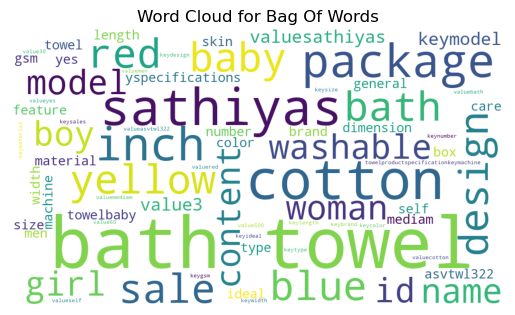

In [35]:
stopwords = set(STOPWORDS) #pas obligatoire puisque nous avons deja supprimer les stopwords

text = ' '.join(tokens)
wc = WordCloud(width = 900, height = 500, background_color = 'white', random_state = 10).generate(text)

plt.title('Word Cloud for Bag Of Words')
plt.imshow(wc)
plt.axis('off')
plt.show()

## Term Frequency

In [36]:
def color(val):
    color = 'mediumaquamarine' if val > 0 else ''
    return f'background-color:{color}'

In [37]:
count_vectorizer = CountVectorizer()

In [38]:
df_M['doc_stemmer']

0       [polyest, multicolor, abstract, eyelet, door, ...
1       [cotton, bath, towelbabi, care, babi, bath, sk...
2       [cotton, terri, face, towel, setbabi, care, ba...
3       [royal, fashion, cotton, print, king, size, do...
4       [print, cotton, floral, king, size, doubl, bed...
                              ...                        
1045    [empow, extra, larg, self, adhes, stickerbabi,...
1046    [larg, vinyl, sticker, stickerbabi, care, babi...
1047    [extra, larg, pigment, polyvinyl, film, import...
1048    [medium, vinyl, sticker, stickerbabi, care, ba...
1049    [larg, vinyl, stickerbabi, care, babi, kid, gi...
Name: doc_stemmer, Length: 1050, dtype: object

In [39]:
documents = df_M['doc_stemmer'].apply(lambda x : ' '.join(x))

In [40]:
documents

0       polyest multicolor abstract eyelet door curtai...
1       cotton bath towelbabi care babi bath skin babi...
2       cotton terri face towel setbabi care babi bath...
3       royal fashion cotton print king size doubl bed...
4       print cotton floral king size doubl bedsheetho...
                              ...                        
1045    empow extra larg self adhes stickerbabi care b...
1046    larg vinyl sticker stickerbabi care babi kid g...
1047    extra larg pigment polyvinyl film import stick...
1048    medium vinyl sticker stickerbabi care babi kid...
1049    larg vinyl stickerbabi care babi kid gift stic...
Name: doc_stemmer, Length: 1050, dtype: object

In [41]:
tf = count_vectorizer.fit_transform(documents)
#on récupere les noms 
tf_features_names = count_vectorizer.get_feature_names_out()


In [42]:
df = pd.DataFrame(data = tf.toarray(), columns = tf_features_names)

In [43]:
#on retrouve bien les 1050 docs qui composent le corpus
df.shape

(1050, 9792)

In [44]:
df.mean().sort_values(ascending = False)

cm              1.234286
packag          1.039048
product         1.025714
value1          0.910476
keymodel        0.796190
                  ...   
length225       0.000952
towels150       0.000952
5099            0.000952
towelsbianca    0.000952
glaskey         0.000952
Length: 9792, dtype: float64

In [45]:
df.sum().sort_values(ascending = False)

cm              1296
packag          1091
product         1077
value1           956
keymodel         836
                ... 
length225          1
towels150          1
5099               1
towelsbianca       1
glaskey            1
Length: 9792, dtype: int64

## Term frequency - Inverse Document Frequency

In [46]:
tfidf_vectorizer = TfidfVectorizer()
documents = df_M['doc_stemmer'].apply(lambda x : ' '.join(x))

tfidf = tfidf_vectorizer.fit_transform(documents)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

df = pd.DataFrame(data = tfidf.toarray(), columns = tfidf_feature_names)

In [47]:
df.shape

(1050, 9792)

In [48]:
df.sum().sort_values()

keybowl               0.027948
2specif               0.027948
valuecaffein          0.027948
size101045caffein     0.027948
valuebowl             0.027948
                       ...    
babi                 27.018301
valueno              28.614949
mug                  30.583506
watch                37.343534
cm                   37.725305
Length: 9792, dtype: float64

## Word Embedding

### Modele Word2Vec
### Objectif du modele :
    - Modele qui permet d'apprendre les représentations vectorielles des differents mots en capturants les relations sémantiques et sytaxiques.
    - Hypotheses sémantiques : le sens d'un mot peut etre compris a partir de son contexte
### Construction du modele : 
    - Reseau de neuronne profond (DNN / RNP)
    - Deux methodes:
    1 - Skip-gram : Cette approche vise à prédire les mots environnants à partir d'un mot donné. Par exemple, étant donné le mot "chien", le modèle tente de prédire les mots voisins tels que "animal", "aboiement", "queue", etc.
    Mieux pour capter les mots rares. Contexte precis, petit corpus
    
    2 - CBOW (Continuous Bag-of-Words) : Cette approche fonctionne à l'inverse du skip-gram. Elle tente de prédire le mot cible en se basant sur les mots environnants. Par exemple, étant donné les mots voisins "animal", "aboiement", "queue", le modèle tente de prédire le mot cible "chien".
    Contexte plus globale avec un grand corpus
    
### Attention : 
    - le format du corpus doit etre [[doc1], [doc2], ....] dans le cas ou nous avons [doc1, doc2, ..] le vocabulaire sera composé non pas de mot mais des lettres de l'alphabet.

In [49]:
#creation d'un corpus spécifique a notre dataframe
corpus = df_M['doc_lemma'].tolist()
#corpus = [mot for liste_mots in mots_colonne for mot in liste_mots] A NE PAS FAIRE
corpus_total = list(abc.sents()) + corpus

In [50]:
len(corpus)

1050

#### Modele avec la methode CBOW

In [51]:
#pour cette methode nous allons utiliser le corpus fourni par la bibliotheque nltk abc.sent()
from nltk.corpus import abc
#windows : Cela définit le nombre de mots voisins à prendre en compte de chaque côté du mot cible lors de l'apprentissage
#min_count: C'est le seuil de fréquence minimum pour un mot.
#sg = skip gram (default = 1)
model_cbow  = gensim.models.Word2Vec(corpus_total, window = 5 ,min_count =1, sg = 0)

In [52]:
#taille de vocabulaire creer par le modele Word2Vec
vocab_len = len(model_cbow.wv)
vocab_len

39396

In [53]:
#selection d'un mot : 
import random
random_word = random.choice(model_cbow.wv.index_to_key)
random_word

'Kilgour'

In [54]:
random_word_idx = model_cbow.wv.key_to_index[random_word]
random_word_idx

12250

In [55]:
random_word_cnt = model_cbow.wv.get_vecattr(random_word, "count")  
random_word_cnt

5

In [56]:
embedding1 = model_cbow.wv.most_similar(random_word)
random_word_vec = model_cbow.wv[random_word]

print(f'Word Embeddibng using Word2Vec: \n\nMost Similar Words => {embedding1} \n\nWord Vector => {random_word_vec}')


Word Embeddibng using Word2Vec: 

Most Similar Words => [('epithelial', 0.9318880438804626), ('coastal', 0.9316694140434265), ('livers', 0.9310214519500732), ('themes', 0.9306178092956543), ('Eylandt', 0.9303479194641113), ('broker', 0.9302511215209961), ('tumour', 0.9297495484352112), ('dynamics', 0.927626371383667), ('lettuce', 0.9272869229316711), ('Online', 0.9271281361579895)] 

Word Vector => [-0.01464541  0.07871388 -0.00828283  0.01262855 -0.0158894  -0.02580915
  0.0333693   0.07499458  0.00300923 -0.04422643  0.01161717 -0.0751905
  0.04173415  0.02072029 -0.0056285  -0.01502138  0.04683799 -0.00366943
 -0.02018054 -0.06449138  0.02693157  0.02095745  0.05638488 -0.00331906
 -0.01118296 -0.00982258 -0.06212294 -0.00563501 -0.03233076 -0.00519399
  0.02798101 -0.01685166  0.00274346 -0.0645925  -0.02861511  0.02882514
 -0.0080899   0.00433128 -0.0103765  -0.0228514   0.03133108 -0.01360066
 -0.01707032 -0.00063123  0.01974242 -0.03376382 -0.02668887 -0.0462066
  0.03408034  0.

In [57]:
model_cbow.wv

In [58]:
model_cbow.wv.get_normed_vectors()

array([[-0.00768246, -0.13641709, -0.0621577 , ..., -0.06195144,
         0.2423534 , -0.02236963],
       [-0.04468621, -0.13189471, -0.06018483, ..., -0.05119085,
         0.17648725, -0.00985337],
       [ 0.0441462 , -0.14013535, -0.06790277, ..., -0.00159503,
         0.2520173 , -0.17272314],
       ...,
       [-0.10576446,  0.16203864, -0.02318469, ...,  0.0905463 ,
         0.02220891,  0.07811801],
       [-0.04286855,  0.0655881 ,  0.06281751, ...,  0.02026951,
        -0.08322804,  0.05255612],
       [-0.12307026,  0.19176137,  0.06941223, ..., -0.01029882,
        -0.11605277, -0.00825887]], dtype=float32)

In [59]:
pca = PCA(n_components = 2)

X = model_cbow.wv.get_normed_vectors()
X = X[ : 10, : ]

result = pca.fit_transform(X)
words = list(word2vec.wv.vocab)
words = words[ : 10]

plt.figure(figsize = (15, 20))
plt.title('Word Embedding using PCA')
plt.scatter(result[ : , 0], result[ : , 1])
for i, word in enumerate(words):
    plt.annotate(word, xy = (result[i, 0], result[i, 1]))
plt.show()

AttributeError: The vocab attribute was removed from KeyedVector in Gensim 4.0.0.
Use KeyedVector's .key_to_index dict, .index_to_key list, and methods .get_vecattr(key, attr) and .set_vecattr(key, attr, new_val) instead.
See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4

In [ ]:
vector1 = word2vec[tokens1[-1]]
print(f'Word Embeddibng using Word2Vec: \n\nMost Similar Words => {embedding1} \n\nWord Vector => {vector1}')

In [ ]:
import warnings
warnings.filterwarnings('ignore')

word2vec = gensim.models.Word2Vec(df_M['doc_lemma'].apply(lambda x : ' '.join(x)))
embedding1 = word2vec.most_similar()

## Vocabulaire

In [ ]:
vocabulaire = set()
for document in df_M['doc_lemma']:
    for mot in document:
        vocabulaire.add(mot)  # Ajouter le mot au vocabulaire

In [ ]:
len(vocabulaire)

## bag of world

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
#initialisation du vectoriseur du doc
vectoriseur = CountVectorizer()
#application du vectorisur au documents

representations = vectoriseur.transform(df_M['doc_lemma'].apply(lambda x : ' '.join(x)))
#création de la database
representation_df = pd.DataFrame(representations.toarray(), columns = vocabulaire )

In [ ]:
representation_df.shape

In [ ]:
representation_df.sum(axis = 0).sort_values(ascending = False)

In [ ]:
count_vectorizer = CountVectorizer()
count_vectorizer.get_params()

In [ ]:
CountVectorizer.__init__

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectrizer = CountVectorizer()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
def cv(data, ngram = 1, MAX_NB_WORDS = 75000):
    count_vectorizer = CountVectorizer(ngram_range = (ngram, ngram), max_features = MAX_NB_WORDS)
    emb = count_vectorizer.fit_transform(data).toarray()
    print("count vectorize with", str(np.array(emb).shape[1]), "features")
    return emb, count_vectorizer

In [ ]:
def print_out(emb, feat, ngram, compared_sentence=0):
    print(ngram,"bag-of-words: ")
    print(feat.get_feature_names(), "\n")
    print(ngram,"bag-of-feature: ")
    print(test_cv_1gram.vocabulary_, "\n")
    print("BoW matrix:")
    print(pd.DataFrame(emb.transpose(), index = feat.get_feature_names()).head(), "\n")
    print(ngram,"vector example:")
    print(df_M["doc_lemma"][compared_sentence])
    print(emb[compared_sentence], "\n")

In [ ]:
test_corpus = df_M["doc_lemma"][:1].tolist()
print("The test corpus: ", test_corpus, "\n")

test_cv_em_1gram, test_cv_1gram = cv(test_corpus, ngram=1)
print_out(test_cv_em_1gram, test_cv_1gram, ngram="Uni-gram")

## TF idf

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectoriseur = TfidfVectorizer()
tfidf_matrix = tfidf_vectoriseur.fit_transform(representation_df)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns = tfidf_vectoriseur.get_feature_names_out())

In [ ]:
tfidf_df.shape

In [ ]:
os.getcwd()

In [ ]:
for dirname, directories, filenames in os.walk('/OpenClassRoom/NLP'):
    for filename in filenames :
        print(os.path.join(dirname,filename))